<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF-280 - Estadística Computacional </h1>
    <h2> Distribuciones Muestrales e Intervalos de Confianza </h2>
    <h4> Ignacio Cea Ruiz </h4>
</center>

## Introducción
Los laboratorios de estadística computacional (LEC) tienen por objetivo principal analizar datos utilizando técnicas de visualización y evidenciar el comportamiento estocástico de experimentos aleatorios mediante simulaciones computacionales. Las experiencias buscan medir la habilidad de programación en Python y sus librerías, la capacidad de análisis estadístico y la comprensión de documentaciones, artículos y papers.

> Recuerde que los laboratorios tienen una ponderación de 25% en la nota final del ramo y que, además, el promedio de estos debe ser mayor o igual a 55 para aprobar el ramo

## Reglamento
1. El desarrollo de los laboratorios debe ser en **Python**.
2. El formato de entrega es un **archivo .ipynb**, es decir, un Jupyter Notebook.
3. El nombre del archivo de entrega del laboratorio *i* debe seguir el siguiente formato: *lec-i-nombregrupo.ipynb*.
4. Se recomienda seguir las recomendaciones de estilo descritas en [PEP 8](https://www.python.org/dev/peps/pep-0008/) y [Type hints](https://docs.python.org/3/library/typing.html) a la hora de programar.
5. El tiempo para la realización de los laboratorios es extenso, por lo que solo se recibirán entregas hasta las 23:59 del día de entrega **a menos que se especifique lo contrario**. Entregas fuera del plazo serán calificadas con nota 0.
6. Antes de entregar su laboratorio verifique su **reproducibilidad**. Jupyter Notebooks con errores a la hora de ejecutarse serán penalizados con descuentos.
7. Solo un integrante por grupo debe realizar la entrega por Aula.
8. El código entregado es solo una guía, se puede modificar sin problemas. Así mismo, para cada ejercicio usted puede crear las funciones que estime conveniente. También puede agregar celdas de markdown para explicar y comentar según corresponda.

## Toolbox

La caja de herramientas (stack de tecnologias) para el presente laboratorio está conformada por:
1. [Python](https://www.python.org/doc/).
2. [Numpy](https://numpy.org/doc/stable/).
3. [Scipy](https://docs.scipy.org/doc/scipy/reference/index.html)
4. [Matplotlib](https://matplotlib.org/stable/contents.html).

Usted es libre de utilizar el entorno de desarrollo que prefiera, sin embargo se recomienda el uso de [Anaconda](https://www.anaconda.com/products/individual#Downloads), ya que incluye las herramientas necesarias para desarrollar los laboratorios, permite una rápida instalación de otras librerías y es compatible con una gran variedad de sistemas operativos.

Usted también es libre de usar tanto Jupyer Notebook (incluido en la instalación individual de Anaconda) como otras alternativas de desarrollo de archivos `.ipynb` tales como [Colab](https://colab.research.google.com/) o [Visual Studio Code](https://code.visualstudio.com/). En el caso de trabajar remotamente se recomienda utilizar Git para trabajar de manera exitosa y ordenada en equipo.

Las librerías se introducirán amigablemente, no se asume ningún tipo de conocimiento previo en las tecnologías presentes en nuestra toolbox salvo por Python, sin embargo, se busca promover la lectura de documentaciones de librerías.

## Experiencia



### 0. Importación de las librerías y funciones útiles

A continuación se importan las librerías que necesitaremos para el correcto desarrollo de esta experiencia. Se recomienda utilizar los aliases por defecto.

In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

### 1. Teorema del Límite Central **(25 pts.)**

El **Teorema del Límite Central** provee un resultado muy interesante para el análisis probabilístico. En palabras simples plantea que, si la variable aleatoria $S_n$ es la suma de $n$ variables aleatorias **independientes** con **media y varianza conocidas** (todas con la misma media y varianza), entonces la distribución de probabilidad de $S_n$ se *aproxima* a una **distribución normal** cuando $n$ tiende a infinito.

Así, si realizamos un experimento cuyo resultado posible se modela con una variable aleatoria con cualquier distribución de probabilidad y, luego, repetimos este experimento muchas veces, podemos asegurar que la suma de dichos resultados se comportará como una distribución normal con media y varianza dadas.

Formalizando: Sean $X_1, X_2, ..., X_n$ variables aleatorias **independientes e idénticamente distribuidas** (propiedad abreviada como *iid*), donde $\text{E}[X_i]=\mu$ y $\text{V}[X_i]=\sigma^2$. Además, definimos $S_n=\sum_{i=1}^nX_i$. Luego:

$$
\begin{equation*}
S_n\sim\text{N}(n\mu, n\sigma^2)
\end{equation*}
$$


Estandarizando, obtenemos la variable aleatoria $Z_n$:
$$
\begin{equation*}
Z_n :=\frac{S_n-n\mu}{\sigma\sqrt{n}}
\end{equation*}
$$

Entonces, la función de distribución de $Z_n$ converge hacia la función de **distribución normal estándar** cuando $n\to\infty$.



* Elija su variable aleatoria $X$ favorita, puede cambiar los parámetros a gusto:

In [2]:
def get_random_variable(option: int):
    if option == 1:
        return sp.beta(5, 2)
    elif option == 2:
        return sp.expon(scale=1/10)
    elif option == 3:
        return sp.f(25, 30)
    elif option == 4:
        return sp.gamma(10)
    elif option == 5:
        return sp.t(30)
    else:
        raise ValueError("Debe elegir una opcion entre 1 y 5")

In [3]:
X = get_random_variable(1)
mean = X.mean()
std_dev = X.std()
print(mean,std_dev)

0.7142857142857143 0.15971914124998499


**1.1)** Con la variable aleatoria elegida, generaremos un conjunto de 1000 muestras para cada uno de los siguientes valores de $n$ (es decir, cantidades de muestras aleatorias a sumar): 10, 100, 1000, 10000. Luego, compararemos estos datos con la distribución normal estándar. Para esto, primero tendremos que estandarizar cada valor de $S_n$ utilizando la fórmula de presentada anteriormente. Compare generando 4 histogramas para los mil valores de $S_n$, agregando la función de masa probabilidad de la normal estándar para comparar. **(10 pts.)**

In [4]:
X.rvs(size=10)

array([0.87009071, 0.57079951, 0.63489299, 0.90400531, 0.85308916,
       0.89849412, 0.93699937, 0.77363092, 0.71232309, 0.78016033])

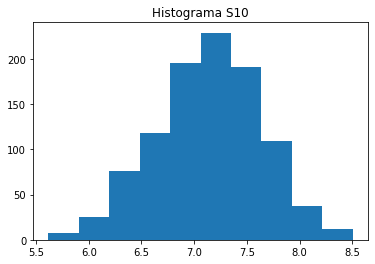

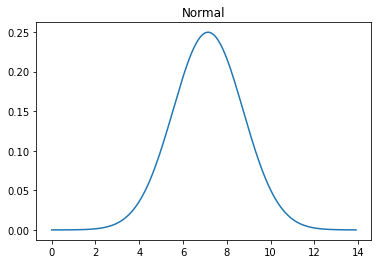

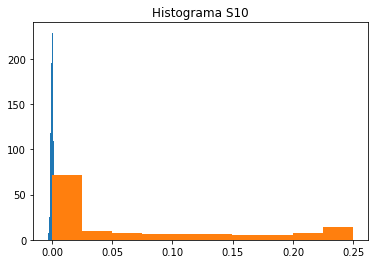

In [5]:
#MUESTRAS
s10=[sum(X.rvs(size=10)) for i in range(1000)]
#Estandarización
#ESTANDARIZACION
def estandarizacion(muestra:list,esperanza:float,desviacionestandar:float,n:int)->list:
    muestraaux=[]
    for x in range(len(muestra)):
        tmpvalue=(muestra[x]-(n*esperanza))/(desviacionestandar*np.sqrt(n))
        muestraaux.append(tmpvalue)
    return muestraaux

s10stdr=estandarizacion(s10,mean,std_dev,10)

#HISTOGRAMAS
plt.title("Histograma S10")
plt.hist(s10,label="S10")
#normal = sp.norm.pdf(x_axis, 0, 1)
#plt.plot(x_axis, normal)
#plt.plot(ns10)
plt.show()

#HISTOGRAMAS
plt.title("Normal")
x_axis = np.arange(0,14, 0.1)
normal = sp.norm.pdf(x_axis,10*mean, 10*std_dev)
plt.plot(x_axis, normal)
plt.show()

dividir = lambda x:x/1000
#HISTOGRAMA ESTANDAR
plt.title("Histograma S10")
plt.hist(list(map(dividir, s10stdr)),label="S10")
plt.hist(sp.norm.pdf(x_axis,10*mean, 10*std_dev))
plt.show()

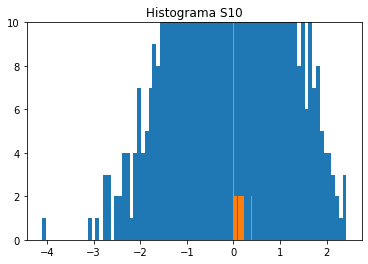

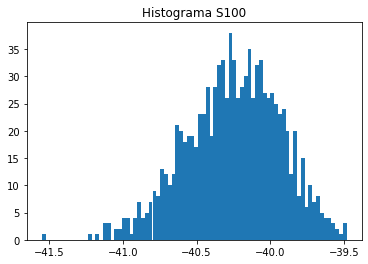

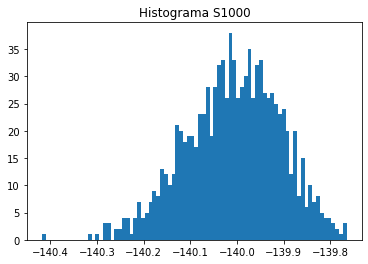

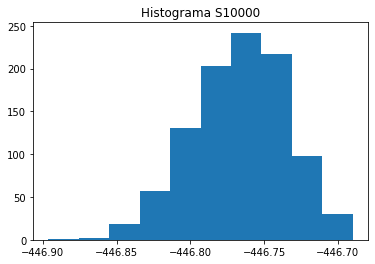

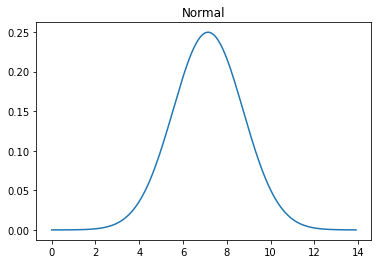

In [6]:
#MUESTRAS
s10=[sum(X.rvs(size=10)) for i in range(1000)]
s100=[sum(X.rvs(size=100))for i in range(1000)]
s1000=[sum(X.rvs(size=1000))for i in range(1000)]
s10000=[sum(X.rvs(size=10000))for i in range(1000)]

#ESTANDARIZACION
def estandarizacion(muestra:list,esperanza:float,desviacionestandar:float,n:int)->list:
    muestraaux=[]
    for x in range(len(muestra)):
        tmpvalue=(muestra[x]-(n*esperanza))/(desviacionestandar*np.sqrt(n))
        muestraaux.append(tmpvalue)
    return muestraaux
#ZN
s10stdr=estandarizacion(s10,mean,std_dev,10)
s100stdr=estandarizacion(s10,mean,std_dev,100)
s1000stdr=estandarizacion(s10,mean,std_dev,1000)
s10000stdr=estandarizacion(s10,mean,std_dev,10000)

#Normal Estandar
x_axis = np.arange(-10,10, 0.1)
#FALTA GENERAR LA NORMAL Y FUNCION DE MASA#

#HISTOGRAMAS
plt.title("Histograma S10")
x_axis = np.arange(-20,20, 0.1)
normal = sp.norm.pdf(x_axis,0, 1)
#plt.plot(x_axis, normal)
plt.hist(s10stdr,bins=80,label="S10")
plt.hist(normal,bins=60,label="Normal")
plt.ylim(0,10)
plt.show()

plt.title("Histograma S100")
x_axis = np.arange(-50,50, 0.1)
normal = sp.norm.pdf(x_axis,0, 1)
plt.hist(s100stdr,bins=80,label="S100")
#plt.hist(normal,bins=60,label="Normal")
#plt.ylim(0,100)
plt.show()

plt.title("Histograma S1000")
plt.hist(s1000stdr,bins=80,label="S1000")
plt.show()

plt.title("Histograma S10000")
plt.hist(s10000stdr);
plt.show()

plt.title("Normal")
x_axis = np.arange(0,14, 0.1)
normal = sp.norm.pdf(x_axis,10*mean, 10*std_dev)
plt.plot(x_axis, normal)
plt.show()


**1.2)** Los *qq-plots* sirven para visualizar qué tan bien se ajusta un conjunto de datos a una distribución en específico. Construya un *qqplot* normal para cada uno de los conjuntos $Z_n$ obtenidos en la pregunta anterior utilizando la función `qqplot` de la librería `statsmodels.graphics.gofplots` (4 gráficos en total). Explique brevemente cómo funcionan este tipo de gráficos. **(8 pts.)**

In [7]:
from statsmodels.graphics.gofplots import qqplot

fig = qqplot(np.array(s10stdr))
plt.show()

fig = qqplot(np.array(s100stdr))
plt.show()

fig = qqplot(np.array(s1000stdr))
plt.show()

fig = qqplot(np.array(s10000stdr))
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

* En el curso INF-280, 40 estudiantes rindieron un control. Después de varios semestres de experiencia, el ayudante sabe que el tiempo que necesita para revisar un control elegido al azar es una variable aleatoria con una media $\mu=10$ minutos y desviación estándar $\sigma=6$ minutos.

**1.3)** Si los tiempos que requiere revisar cada control son independientes entre sí y el ayudante comienza a revisarlos a las 18:00 horas, ¿cuál es la probabilidad de que termine su trabajo antes de que sus amigos se conecten a jugar Minecraft a las 23:30 horas? **(7 pts.)**

In [ ]:

n = 40 
mu = 10 
sigma2 = np.power(6,2) 
#tranformacion de horas a minutos
T_init = 1080 # 18:00 horas
T_final = 1410 #23:30 horas
X = T_final - T_init

Zn= (X-n*mu)/(6*np.power(n,1/2))
probabilidad= sp.norm.pdf(Zn)
print(probabilidad)

### 2. Ley de los Grandes Números **(25 pts.)**

Bajo este término se engloban varios teoremas que describen el comportamiento de una sucesión de variables aleatorias conforme aumenta su número de ensayos. Las más famosas son la **Ley Débil** y la **Ley Fuerte**. Estas leyes explican por qué el promedio de una muestra al azar de gran tamaño de una población tenderá a estar cerca de la media poblacional.

#### Ley Débil de los Grandes Números
Sea $X_1, X_2, ..., X_n$ una sucesión de variables aleatorias independientes con el mismo valor esperado $\mu$ y varianza $\sigma^2$. Entonces, cuando $n\to\infty$, el promedio $\overline{X}_n=\frac{X_1+...+X_n}{n}$ **converge en probabilidad** a $\mu$. Formalmente, para cualquier número positivo $\epsilon$, se tiene:
$$
\begin{equation*}
\lim_{n\to\infty} \text{P}\left(\left|\overline{X}_n-\mu\right|>\epsilon\right)=0
\end{equation*}
$$

**2.1)** Explique con sus palabras qué se entiende por **convergencia en probabilidad**. **(5 pts.)**

**Respuesta**:

#### Ley Fuerte de los Grandes Números
Considerando la misma sucesión de variables aleatorias independientes de la sección anterior, se cumple:
$$
\begin{equation*}
\text{P}\left(\lim_{n\to\infty}\overline{X}_n=\mu\right)=1
\end{equation*}
$$
Es decir, el promedio de las variables aleatorias converge a $\mu$ **casi seguramente**.

**2.2)** Explique con sus palabras qué se entiende por una convergencia **casi segura**. **(5 pts.)**

**Respuesta**:

**2.3)** Corrobore el cumplimiento de la ley generando muestras aleatorias de tamaño $10^i$, donde $i\in[1, 6]$, a partir de una distribución beta con parámetros $\alpha=2$ y $\beta=5$. Obtenga la esperanza teórica de la distribución ($\mu$) y comente qué sucede con los promedios de las muestras y a qué valor convergen. **(10 pts.)**

**2.4)** Una moneda es lanzada 9999 veces, obteniendo cara 4998 veces y sellos 5001 veces. ¿Cuál es la probabilidad de que en el siguiente lanzamiento se obtenga cara? (*Hint*: Investigue y comente sobre la **Falacia del Apostador**) **(5 pts.)**

**Respuesta**:

### 3. Intervalos de Confianza (IC) **(50 pts)**

Supongamos que tenemos un conjunto de variables aleatorias $X_i$ independientes e idénticamente distribuidas (*iid*) cuyos parámetros asociados desconocemos (media $\mu$, varianza $\sigma^2$). Cada una de estas variables aleatorias se materializan en un valor específico al momento de obtener una muestra. Luego, con los datos de la *muestra*, podemos *estimar* los parámetros que informan el comportamiento de la *población* en su conjunto. 

Existen **métodos de estimación puntual** que permiten dar con un único valor que constituye un **estimador** de un parámetro dado. Sin embargo, es muy ambicioso pretender que el parámetro poblacional sea exactamente el valor estimado. Por ello, es más conveniente decir que el parámetro buscado se encontrará en un intervalo dado con cierto grado de confianza:
$$
\begin{equation*}
\theta \in [L_{\text{inferior}}, L_{\text{superior}}]
\end{equation*}
$$
Lo anterior es la definición de un **intervalo de confianza**. Es importante saber cómo interpretarlos. 

> Suponga que quiere construir un intervalo de confianza con un 95% de grados de confianza para cierto parámetro poblacional. Es importante notar que el intervalo de confianza obtenido dependerá de la información muestral, la cual es aleatoria. Dicho esto, construir un IC con un 95% de grados de confianza NO quiere decir que la probabilidad de que el parámetro buscado esté dentro de dicho IC será del 95%, sino que el 95% de los intervalos construidos contendrá efectivamente al parámetro estimado.

<center>
    <img src="ic.png" style="width:25%">
</center>

Cien intervalos de confianza construidos con un 95% de certeza. Observamos que de los 100, solamente 7 NO contienen al parámetro $\mu$ .

A continuación, veremos formas de construirlos y cómo trabajar con ellos. Para ello, seguiremos las siguientes convenciones de notación:
* $\overline{X}$ es la media muestral.
* $\gamma=(1-\alpha)$ son los grados de certeza. Es decir, si quiero un IC con un 0.95 (95%) de certeza, $\alpha=0.05$.
* $\sigma$ es la desviación estándar poblacional.
* $S$ es la desviación estándar muestral, definida como varianza: $S^2=\frac{1}{n-1}\sum(x_i-\overline{X})^2$.
* $n$ es el tamaño de la muestra.
* $Z_q$ es el cuantil $q$ de una distribución normal estándar.
* $t_{q; n}$ es el cuantil $q$ de una distribución t-student con $n$ grados de libertad.
* $\chi^2_{q; n}$ es el cuantil $q$ de una distribución chi-cuadrado con $n$ grados de libertad.

#### Construcción de intervalos de confianza para la media poblacional $\mu$

* **Desviación estándar poblacional $\sigma$ conocida**
$$
\begin{equation*}
\mu\in\left[\overline{X}-Z_{1-\frac{\alpha}{2}}\cdot\frac{\sigma}{\sqrt{n}}; \quad \overline{X}+Z_{1-\frac{\alpha}{2}}\cdot\frac{\sigma}{\sqrt{n}}\right]
\end{equation*}
$$

* **Desviación estándar poblacional $\sigma$ desconocida**
$$
\begin{equation*}
\mu\in\left[\overline{X}-t_{1-\frac{\alpha}{2}; n-1}\cdot\frac{S}{\sqrt{n}}; \quad \overline{X}+t_{1-\frac{\alpha}{2}; n-1}\cdot\frac{S}{\sqrt{n}}\right]
\end{equation*}
$$

**3.1)** Complete la función `mean_confidence_interval()`. Esta retornará el intervalo de confianza estimado para la media poblacional $\mu$ para una muestra descrita por su media muestral `sample_mean` ($\overline{X}$), tamaño `sample_size` ($n$) y desviación estándar muestral ($S$) o poblacional ($\sigma$) `std_dev`, además del `alpha` correspondiente a los grados de certeza $\gamma=(1-\alpha)$. También incluye el booleano `pop_std_dev`, el cual indica si el parámetro `std_dev` corresponde a la desviación estándar muestral o poblacional; de acuerdo a esta condición, la función debe utilizar uno u otro de los intervalos descritos anteriormente. **(5 pts.)**

In [ ]:
from typing import Tuple

def mean_confidence_interval(sample_mean: float,#X  como se asemeja a la normal -> mu=0  X/(sigmaS/np.power(n,1/2))
                             sample_size: int,#n
                             std_dev: float,#desviacion estandar muestral o poblacional
                             pop_std_dev: bool,
                             alpha: float
                             ) -> Tuple[float, float]:
    
    lista=[]
    if pop_std_dev == True: #muestral
        X=sample_mean #media X
        n=sample_size #n
        S=std_dev #
        Z= sp.norm.ppf(alpha/2) 
        valor2=X-Z*(S/np.power(n,1/2))
        valor1=X+Z*(S/np.power(n,1/2))
        lista.append((valor1,valor2))
        print(True)
    else:#poblacional
        print(False)
        X=sample_mean #media X
        n=sample_size #n
        S=std_dev #
        t= np.std(S)
        print(t)
        valor1=X-t*(S/np.power(n,1/2))
        print(valor1)
        
    return(lista)

#desviacion estandar muestral = True
        
# Algunos ejemplos para comprobar que la funcion hace lo correcto.

#

print(mean_confidence_interval(300, 45, 10, False, 0.05))
# Output: (296.99566740935074, 303.00433259064926)

print(mean_confidence_interval(300, 45, 10, True, 0.05))
# Output: (297.07825819807806, 302.92174180192194)

print(mean_confidence_interval(36, 20, 2, True, 0.10))
# Output: (35.26439909541988, 36.73560090458012)

* Se está estudiando la calidad del agua de llave de cierta localidad. Para esto, se tomaron muestras aleatorias del TDS del agua de las casas de esta zona. El TDS es la proporción de residuo seco que engloba sales inorgánicas y pequeñas cantidades de materia orgánica disueltas en el agua. Se mide en [mg/l]. Suponga que la distribución de probabilidad del TDS del agua para esta localidad es una normal con desviación estándar de 30 [mg/l].

**3.2)** Calcule un intervalo de confianza del 95% para la media poblacional del TDS, si el promedio en una muestra de tamaño 30 fue de 475 [mg/l] **(5 pts.)**

In [16]:
dtv=30
mu= 475
n=30
alpha= 0.05
alpha_mean= alpha/2
Z= sp.norm.ppf(alpha_mean) 
#result1=[Z*dtv+mu,-Z*dtv+mu]
result2=[(Z*dtv/np.power(n,1/2))+mu,-(Z*dtv/np.power(n,1/2))+mu]
print(result1)

[416.20108046379835, 533.7989195362017]


**3.3)** ¿De qué tamaño debe ser una muestra si se quiere que el ancho del intervalo de 95% de confianza sea de 1 [mg/l]? **(6 pts.)**

In [21]:
dtv=30
alpha=0.05
alpha_mean=alpha/2
Z=sp.norm.ppf(alpha_mean)
x1=1
x2=-1
mu=475

resultado=np.power(((dtv*Z)/(x1-mu)),2)

print(resultado)



0.015387993994128052


**3.4)** Obtenga $10^5$ muestras aleatorias de tamaño 20 a partir de una distribución normal con la desviación estándar mencionada en el enunciado y una media poblacional $\mu=500$. Para cada muestra aleatoria, calcule el intervalo de confianza del 95% para su media poblacional. ¿Qué porcentaje de estos intervalos incluye la media real de la población? **(6 pts.)**

In [42]:
sigma=30
mu=500
alpha=0.05
alpha_mean=alpha/2
lista=[]
dtv=30
cont=0
for i in range(np.power(10,5)):
    s = sum(np.random.normal(mu, sigma, 20))/20#media
    n=20
    Z=sp.norm.ppf(alpha_mean)
    result2=[(Z*dtv/np.power(n,1/2))+s,-(Z*dtv/np.power(n,1/2))+s]
    if(result2[0]<=mu):
        cont+=1
resultado = cont/np.power(10,5)
print(resultado)
print("El porcentaje de intervalos de confianza que contiene la media poblacional es ",resultado*100,"%")

0.97479
El porcentaje de intervalos de confianza que contiene la media poblacional es  97.479 %


In [ ]:
sigma=30
mu=500
alpha=0.05
alpha_mean=alpha/2
lista=[]
dtv=30
cont=0
for i in range(np.power(10,5)):
    s = sum(np.random.normal(mu, sigma, 1))/1#media
    print(s)
    n=1
    Z=sp.norm.ppf(alpha_mean)
    result2=[(Z*dtv/np.power(n,1/2))+s,-(Z*dtv/np.power(n,1/2))+s]
    if(result2[0]<=mu):
        cont+=1
resultado = cont/np.power(10,5)
print(resultado)
print("El porcentaje de intervalos de confianza que contiene la media poblacional es ",resultado*100,"%")

464.5522530859908
426.09599854484577
477.9186860717745
464.21798293599045
497.09752329937095
485.93689569690775
529.933729562724
504.1925009361902
470.249558477008
493.0328096004533
516.1554916206309
544.198397429954
506.6210367184651
482.92598569724845
517.8600850740343
451.6668511849823
554.2370731498102
528.521507715603
482.7716848899507
514.741950501291
549.041483828553
513.9709438025438
486.1974496230301
446.48337760786933
537.7464932521701
488.05484454939574
534.1170040401146
475.9891877723408
474.11479817916666
470.86844856212593
506.42237402057384
546.0433239285742
491.67798310081537
540.3539445188986
528.6724808078154
500.4874323973333
498.972757989414
467.83433985237343
527.1138404872569
452.2482991424186
484.0234073483465
443.4431156475094
480.7022123578474
414.6497682773317
542.4552070027034
483.8217510039645
521.1425487567601
492.74219069915034
482.50093753921664
463.2624315957787
477.4738767131135
489.8096243459973
467.38950530875405
450.0319891187193
516.6812176183331
52

518.4666678698104
518.5870503187698
490.8889515691561
523.9927257365189
516.536721065687
501.0645216520565
519.1876273866443
476.931747209657
524.3976068811406
532.0365911478148
494.3878715363275
481.6449057963657
507.3953398445894
521.9030192967605
514.0008766104017
508.59181723302333
515.7113092173244
495.7735226746023
451.98842248414724
471.2104422500089
505.6037534472649
544.116937414274
462.50820514904774
456.33813243638497
478.36819242844194
484.09535139731355
489.42500820714395
499.51139733843536
535.7520385866276
488.9456844273764
488.73970379026946
512.1639554870034
472.31236005724224
531.3962931554838
452.3669757214468
510.3685146143838
489.97997352201753
450.12616340409977
504.3770348767812
468.90302597609787
523.9568977259381
552.0142303976883
520.9884509841492
492.3075860196951
501.0501222981842
549.6380159068004
472.3580742998633
493.6303320771843
522.9130823774517
519.2922522204286
504.02530573704905
504.78313431424175
473.93562194665344
477.1540528242462
482.44161579581

517.9552074343316
474.57887877621926
530.9869412605138
519.0758867840261
463.583960728081
494.3552428308103
519.9070483903135
565.4066222855968
444.6648953671103
509.08607072139176
512.4247962008503
516.8825653527706
516.4215086791178
477.35796107447277
483.07522517149954
538.6705445332979
459.3948461023662
458.03953963153816
472.60072184240073
482.3052451016903
486.6525758670681
460.8625441538773
492.19528642912485
483.1467979999304
505.74594335189124
540.8988012590402
524.8683276387636
537.6016425540495
522.564873517467
467.1936816185769
506.6690220698414
485.2769633180773
541.9858661572702
472.8239665872732
511.0122504789408
537.0714808355629
495.00119059771714
507.8643378131282
503.601912515431
487.30608920707743
511.79514600923903
504.2870970718544
509.72069265492433
477.342035832712
440.86905793630206
481.66372100481817
527.5960146955788
519.8265766759297
532.5911523627467
461.14586679007965
516.6133156890514
494.562924842121
443.24436739506274
491.674821881286
505.7736281346077


462.38005413746976
534.1513482515984
510.62175212786616
504.752621156983
549.6513867160036
493.20784724217077
512.2311556558573
485.90228452792985
480.7842090031828
451.763965245635
446.74107991315327
516.889668413892
509.15116459189346
524.035256370125
483.29389825913
560.6240978677946
511.1495370748769
534.890729560197
501.5277235527094
490.01453000157636
526.8360886213516
468.03443473384345
422.78895050104427
486.2097004247654
544.2699816490986
511.3873324650707
525.0589304220198
498.1546613946182
450.4527969489416
504.21192991475874
506.28788581761427
509.46656165023114
467.2561585007308
503.2874603459062
503.85048036177596
509.7658756788887
482.8866023957336
471.5040547353175
473.80336063781084
459.3825192267783
511.49928059814573
479.96578110475645
536.0503265737949
456.5419555668786
479.47177482820086
528.5493107062562
498.96928355136674
527.9315950821089
467.0315624018683
475.9134070943861
509.7897318312804
525.9846959725204
474.5655223770311
516.1041919623448
516.238577370767


470.9393598055028
504.40916754912394
486.40629037211784
531.0156147171546
508.24850176326004
520.577734049908
491.6342005915308
535.6181132117622
539.5172868595755
468.12697750950554
572.6841118155214
487.46264374930576
483.3183635168564
535.3071624938493
479.9173014563365
609.0837755769485
558.1187818311786
556.851394691605
487.98776629753405
477.47290584789465
548.7391738687238
460.2753184652925
529.506915192081
562.4215347733272
521.0128979799938
504.7618058352085
509.35734205300236
481.930360639205
458.0347535786183
511.13989056077884
447.0275377857011
498.0241532823197
391.4251510060236
523.5740611829566
500.8372453703853
480.43596260661917
522.5873681239034
473.56748232315965
486.6511803093373
578.9286968560848
510.1556636911536
507.9301959910119
522.8958046444234
449.5601517369769
513.7802028063302
547.1883099712871
516.3098177521709
514.9858328190563
521.6058812084303
547.4710390481582
519.7798935450083
506.1728036010423
515.8728807210202
493.5870587461511
494.1947977373641
470

493.2488286816441
491.6592133037318
512.1103488493163
465.0692531947259
496.02361234613534
501.4691065624513
502.1827191122238
513.1642094135416
507.5426666738723
499.43170070695754
473.25940975588037
443.6408512347153
501.4570950273013
504.8350991364375
488.5031257277354
508.62070397993057
444.76614205840815
476.5035273159615
586.4620214807679
534.76585046116
497.6144363674142
529.5895783649777
524.6336734547461
452.34413173626984
475.5360802814105
448.76395384800435
486.3627761941769
511.86831429401826
490.34129039154124
494.41997483577745
466.6422254304871
516.2301954107085
509.87030277182924
483.3650665282416
566.2768888523932
451.61510827440475
496.25314736660164
481.4048604029934
515.2145389701319
501.80606786079386
480.43259313053403
516.0270734139775
483.02532290960767
510.8624093576449
480.5149842281175
461.73806741507315
503.8951453355173
482.56043322162446
485.9228173239878
547.3524088119736
448.5623344410182
504.4721730443467
496.5479950757061
496.3696749307977
475.85435592

489.7620732345565
535.0637512727205
488.72797880076575
481.1240868622078
484.9363816342135
507.33428416813973
474.49133407239486
486.5201379245939
482.6932106554783
468.19413187123666
536.5596904318065
482.8579932168531
482.0694491789921
483.4639160361935
485.50351784613844
503.2791985759681
518.0729404587529
572.0504375715064
514.3023379304285
507.85114966146193
480.2063349602904
504.9214217378621
492.79519333594317
562.814243185841
531.3630857691345
478.52230329405893
485.26093640208217
518.031693468251
457.07261685521206
499.2954426141673
490.3115488772683
524.3473198581404
468.03883852894955
483.90186775316283
503.6576870634671
464.0127047594449
506.5212377307531
467.6524603837347
545.3075855278895
532.0743526600477
487.0137613320485
468.48768820730265
525.2199228984855
516.7411272585201
496.55866474496224
480.9800186183577
470.9211507530472
529.9705500793264
458.36488055584186
561.1367179142732
516.6900733468483
495.4289979045309
496.6448893697579
487.0964192959024
473.11277104959

515.0105468946074
474.9565888847435
493.9793298268173
533.8809116050362
457.1300719024117
508.2907603308257
510.3162873755715
497.0989466114714
497.6345996406782
531.3314964365482
476.7982770862997
487.02563785854426
545.3753607941613
557.3003088061342
521.06826894653
511.6124824828298
550.7602407779567
499.7477444405931
496.46878580154015
501.13311147242365
527.8565011677834
487.23587247634634
511.4697715232374
519.1395202309352
529.3606938465116
482.107249892242
489.37254155833256
504.6550040956569
491.45767040744863
441.1741333292545
506.0649205844355
461.89866383263006
496.69461143518674
531.6441100624005
508.9442369263779
499.283493438871
515.0696560453117
517.6270831290259
493.16701456335943
488.1622111642238
499.92044679857867
514.7232465808611
511.33502908341416
509.67950840552567
466.2699900857604
459.32301087710556
506.3901810606599
472.7395304849975
491.71089658300053
509.8624662587287
427.16956866118306
530.8369558032614
489.9242973335478
468.45635240066343
493.196944045465

518.4011175243053
512.4140001525849
545.2112364576637
490.34560431224446
484.22235980858994
490.28768236712904
479.5412205892336
526.4671738963754
498.6123526263104
516.1462546369925
550.4068439564295
514.9629695624282
535.2807588050043
542.5277960467212
498.5607313664033
492.4103766932306
482.8335337327707
488.1188074016105
491.2005105430446
536.992854639849
542.9594572686734
468.7507435002743
429.34667933386834
556.2685502472513
521.3039476661584
525.5885124561289
536.6817397509944
530.0375087785634
505.1143380859601
570.3071847599956
464.1865698093372
445.5567997599946
499.9350615971182
549.7565797545146
512.6456809930437
445.1594803663809
527.0177454729957
528.2046658559755
493.447908535455
502.22601255679825
496.62440921395296
521.0616565799866
450.8576826844928
470.0063636952791
510.2564823820181
475.2629649578949
499.5554100977149
492.4924960445551
481.8471416569555
472.549815440584
523.9223891318227
531.1695250900024
464.6938002414676
459.46359217467443
549.6989185021714
474.29

457.1575239153355
496.982838987071
519.6844114652209
486.16515827977224
511.31227536035937
497.5714424236119
490.78514432034734
548.368840642898
492.63968490463884
473.14302642446773
499.3249786275711
471.0373171496131
505.8030108612063
519.2785448103389
431.68944682133827
490.6534538677397
516.2299472734423
511.0156292580717
426.22195143271733
443.03355499239416
519.4770378356093
520.7039521520177
524.653615233815
512.2008563732162
468.49659911067243
491.7648854864462
544.8210103655789
472.0039687227505
499.611287107163
462.62283680902243
514.9035575772422
497.26268231909836
544.105073235523
486.03432465165406
533.5372749471939
509.48673947365666
487.095197391818
483.25152899273587
512.3441910989873
518.9427550284855
519.971019299043
497.32690401271856
468.5630840155456
536.0747479706963
511.95150540625605
504.59055243495163
450.11675905638975
538.4765343444753
501.34200285579277
478.238181336648
524.7385916437574
492.01855991360645
484.99020027962104
490.97963179265594
508.3991683099

456.36768509202733
540.5953294242563
517.7087799767282
463.2196594432105
519.932512028132
458.0245752323203
527.1524042029062
490.6910217848704
544.1280749073894
520.6990350515994
512.8130953271144
452.2674397844519
501.8666503170669
481.07556810718717
522.2433085346157
515.0972729661374
516.6809979404211
464.2197907739506
508.78868714148405
500.5668858320083
481.073098227576
519.0720483443845
516.6742959122089
458.27839643661997
447.3859551553708
477.73731072209904
505.02476794578956
516.1593746520584
498.30151406896385
522.5663868718149
550.0197165281762
503.8465234848812
496.6019511824599
511.5859722978106
527.2974350015651
507.34516563051824
480.851298178811
449.4020358693382
538.8950354370544
496.9299933403394
470.4739614284804
512.9298021214721
507.230348521123
482.79326664802363
516.5384895405872
504.16044415537965
484.87061636143324
514.8204231318497
486.85307354049974
515.1255070414271
446.2437452673105
494.1479471722707
492.0052843926758
526.7463621934085
476.5114230855884
50

453.6858685328751
538.8345967862317
504.5000386992967
481.5836546148811
429.1463605629875
545.7663733049113
495.3653786671639
499.28567784734895
504.94389209704866
454.60209904045485
513.7252484429887
535.3395648168738
534.7693612563862
483.48577928297664
511.95944158295583
461.0018450252999
538.2199675741091
488.3260175575403
533.587311348698
544.0355415825129
516.8778197662176
527.186584160944
561.7408853233048
434.02428243406905
461.55448530576905
484.34673336919843
524.8873196145389
472.7852211721952
478.76787591664754
488.7386908317242
438.89456841035496
512.5003006138514
494.0934627034693
445.01149626411245
489.84286085209
494.08608157909765
501.54816026161274
473.5519464959191
532.8046185447281
488.77194067852
442.08092096999553
561.9585010317895
494.14279923870674
551.599181448375
582.9341172971682
468.2530798757768
541.915019644137
525.7324105775452
529.7076221388677
506.75222633650765
499.91950154564785
480.73841843661114
499.2982710929594
452.70409977295355
496.4947688011959

490.7119667418951
521.0744006774828
487.00319371755853
484.66750424704315
518.8956424633077
562.7538893760697
494.090277911268
505.2845693132318
494.13699576674236
514.7409541406869
519.0711003589367
504.39199092027354
483.64596344905505
496.4143047599615
474.3235317431204
447.17066120517654
486.18739070318617
436.7473627366622
479.2023927383846
488.4375183565606
465.77964206399133
509.71569654509653
460.92100723763093
486.44917862694115
540.8240707257357
530.7572997062805
529.8983730382927
484.79713309839457
511.35424337424723
524.9623679689433
483.2657994414734
489.87792216757055
470.1071584768718
462.31852482626
539.5508588994978
454.0864928812848
488.29674482078974
487.99851087711835
500.45415768937426
464.03380516674156
520.1344933441438
438.70283990195395
546.6985496006238
520.7887241472274
514.3098460823508
477.8822964916749
448.2787752733994
449.71645311121074
513.0232491392035
552.0866690629304
490.53685885681074
468.1297540821949
508.40746783561525
544.3835411613056
553.04391

495.1736353995315
554.6077810599302
468.6925524673038
527.5361616490602
487.77358607260015
448.7202278298015
456.4645815581381
477.2917462862072
499.434444723487
452.3008962185242
524.6228290203866
417.18641933582904
491.45305147048623
521.1562370174584
553.234670594981
511.67332921868586
486.41665979667937
492.9661670779708
520.5811725084293
479.5902340254048
533.8423362734743
517.1017745575845
480.75015899557275
482.0203133655141
523.3118499251184
494.30954582322374
540.3917903834553
486.08863563737754
460.24993173783247
513.8418162111844
532.4409669316085
561.054504879929
444.87568902417667
486.6555277173679
498.57491448432614
515.8994821374142
486.8172430833235
483.4839580290468
497.841290569762
455.86060881579505
548.4327124994008
472.8866207727741
501.0802741239711
506.8223720798169
465.1895016901175
493.6692286044387
523.7785027227212
523.8755968176237
498.8830030450967
484.07612812670703
493.9513823015201
440.7872569303799
487.6920084834517
514.2644770947052
507.32417939560605


423.36511815231125
486.9078261144121
466.1251410393046
475.8931594050773
508.87318936524974
492.21240375260487
487.05516948294616
466.206172349521
469.8788162119709
537.1265471534997
448.32816539311244
453.3958242092475
472.74872011169583
496.3532150698175
479.99835235664506
494.39568430829706
513.9764816885731
483.6640340907672
469.44730205932245
501.84976827720743
516.3371748763717
530.3854580038262
503.68949595719477
515.3323165325158
504.91528743239263
513.4492967649292
453.7742458654017
500.93066824446566
494.39662943580913
527.6026389341267
457.39665447716055
482.62142784335254
472.4398422338231
539.0812333218556
466.9484785074525
507.68903806597024
515.9036166440874
512.3055103192678
453.3830097770142
485.14509377841887
499.5620848789917
497.3998096019031
471.80329087665314
528.682418396035
509.01341869281555
530.3728906884096
468.3095147926217
515.8147791413738
515.246701074976
477.8788657262376
483.1335508980203
484.76155686972913
485.9689547925101
510.7339859576184
512.933092

505.4144064157563
477.0926557347207
526.936110096925
475.8031991431307
478.86341435693225
497.10932574310317
475.1429117420307
557.8917120270258
522.1777825407535
476.1390788530881
486.65931889654775
483.1356467715542
492.37239192875745
436.04183151752306
545.7238420372175
541.0099632748969
509.606087595956
485.1496925561127
498.69237600301096
508.2949238615912
510.13156587376136
512.1250988731756
498.5456830755515
486.47447700551254
496.4178552102295
543.2871523030365
479.6332528493829
496.69607770188117
494.3165219471934
430.6406041249237
511.44964384371974
518.533147790549
511.82837412943417
494.87971224959495
461.6595093229929
507.0883217027646
482.3129388389262
507.59017430213976
538.805337207036
523.4988641054006
477.73075603050887
519.011832713462
456.2131528977744
464.34226797186767
469.56025444907294
544.5405197753674
471.0090220296804
545.6244782815139
497.34582875411127
525.931954501989
524.535705010379
517.5844881195685
487.96290943253314
536.2035668874812
471.5689469513172

479.58561170058374
513.7506983237337
511.59039024436413
564.1477065406531
478.00164628907584
491.3777347756621
463.07185836663825
484.7184643096783
525.8152100476844
528.630401379134
479.18517332075413
445.7808774539816
553.246285233835
576.0157850882935
511.03075351448854
485.06285954155044
528.0241233352601
420.8258526703985
453.4248388139443
492.0345202395181
485.474620966488
481.4032800195628
551.3519528604841
475.58253658453947
480.5061977132222
468.80764363047325
521.8618924248185
550.6736784768118
513.1060118130727
515.0860510611041
464.704515863906
458.57268410711765
497.45390703102476
555.0417455858982
375.69079579772347
469.10128517611656
524.8053192248655
548.25804978157
508.71227915433303
494.89064037146096
483.57677870861073
509.6824587736121
505.4625982842359
486.03657204505424
497.70969667589736
533.4157928846882
476.27868040010264
506.64344939910086
506.4744985160945
510.2787136692365
496.5053190937781
534.2635109865379
515.5353994650918
489.7477916872585
471.1830841877

466.2362656180601
455.64708317259186
496.8491543664013
488.8541436786268
535.8422887353673
488.5916485600297
459.69995639919733
479.62079680227606
466.6078700956317
494.5933635014219
454.0215599470613
542.4656584970967
505.38714651552067
512.7106921327379
515.6107141884057
436.2526439967285
455.54083994440833
520.4386936500035
508.287050394327
538.1620464386037
508.4983321291741
503.70693954896575
486.58995257156965
481.5939421628327
511.7929173353253
480.5711786843229
464.3748357620536
501.12217446915633
435.40776492448254
482.00058574824595
489.5318449586958
545.3584793501302
490.26221362510705
530.2634458682334
511.7159702307524
525.1902316240386
492.0700963043869
486.69507627338777
475.3352942843285
476.09163332285794
494.14945979342997
503.9790285419065
493.2449054093443
527.7273304961882
498.21327124756465
558.7138545311595
467.08901986983005
484.7237348481189
510.4007232685809
508.1939333373519
477.049166149668
511.8393152683331
546.3656863725093
507.93514615083905
516.563976052

487.18953198141537
475.3873634752484
503.2784253216267
450.2517377874534
501.4015479025628
490.3294549640233
490.7171397410484
487.0379373084379
476.24750524009926
495.3678228009743
475.1711013904569
501.6805826646669
476.3730883839673
456.48774854692675
487.4003586717075
512.5137242847758
479.5921677307203
504.4774995157469
520.4118848574718
482.7261578580902
516.3891038705876
451.89349973933196
494.37822170451255
507.96517910874104
481.56166919150775
527.8522205447609
529.6949404390404
453.71452536462033
519.2656868327509
459.02437274159007
472.49351507937064
505.89030751814164
513.6503674861266
474.3070826736483
527.0363822749408
542.1702713919374
527.8702111787342
531.3660610881608
508.56347714678196
486.76285745015645
497.88879530282986
549.5892697144332
458.4780362652828
575.7340707718176
511.0258948692378
460.8029400437521
534.7757257799825
470.2459328705813
459.73853312015996
512.8115603842235
435.1968179195941
537.341390457383
466.5579031793108
513.3453661185051
484.4194288589

503.7085190825083
482.29930504476965
501.08057324706033
479.7334844096617
499.09416575757933
529.3399635002039
472.5862763950075
488.0263279545567
483.36374108038683
468.99810295076736
506.98299041649256
515.833530042607
475.02738825747645
465.6737954059323
531.8695612312194
499.86339389114306
491.38063035558093
512.8987536902548
499.4845698830428
492.6156849488223
484.46576950139877
481.7639945549766
530.6131972134367
475.576700655275
456.3772835107281
434.24202694280206
480.2742857109583
509.90637371527595
501.2130469511777
487.2735494876315
505.3437338476347
528.2921041411159
476.3809297209651
491.07010303672246
521.5384399600733
532.433834222765
467.0161855875042
517.9041557956537
541.0324375044603
484.86375240553167
477.4455595547835
522.5317786630874
507.8670464665802
453.0888949661162
511.4333482088607
474.7257782830041
504.9064252932564
487.94602205125835
477.67647663938135
457.2587941647872
498.43841208389233
462.0434225408939
492.4059716696332
508.58961725548784
526.995727361

471.71820484360126
482.5851835166587
498.2175102795621
473.70841031179117
512.1514888602768
468.6962390547476
512.3876219926975
447.1984729325165
544.2315705922434
520.1774198538815
449.5249683317626
479.1214887685902
504.31468273245713
466.66832107199565
510.63034195700135
541.4087737295853
547.5538227170904
461.18948649392087
491.8468197082635
541.1112544755085
455.5122014983213
482.3189921552424
481.35120405140026
531.8788278597814
489.0130216365604
537.5853544915165
513.7008603657118
489.1224092296468
503.054983185321
475.83467262104097
499.17977577277946
481.33124800228194
457.89348656609155
547.7161766152313
523.4548292148517
490.5993130457085
491.8845862275906
491.974624566677
475.6631235075282
525.6745792415275
469.04133504530057
479.2655037837629
513.4155027866959
517.368519554795
480.11169030824
478.33390328183896
500.79851582468154
518.1463507737907
494.29771766466473
519.4366516516402
448.93127808010263
500.8027332397374
503.30743746083135
505.38978260867907
497.10644455372

502.14615763551654
533.2161826848826
542.4385168955669
465.1367768281968
577.9527211358426
496.0323661608095
475.0288079120179
496.12362461659404
497.4354245096178
496.1227237513331
487.98147278228237
524.3249521585168
517.6734045211635
527.2017662966555
495.16314440161966
484.3153955958357
541.313810957988
470.2153735651074
530.3189834520491
492.93564419281404
496.098795839197
505.2489790271446
427.31700820198506
499.60355419819786
459.45563131200737
480.50658305138967
494.0733283696355
495.59615245962743
540.4288569325264
519.2065113318854
508.84461438152675
458.990990005687
535.572607739128
495.8451417529095
472.43462085778526
499.06213181916667
524.6813730607228
495.50021716772267
506.71553565114397
493.31972049284315
496.16970658657
543.4928134374651
526.6641463739443
487.05983432718847
533.1785538320485
550.7904864984807
504.0790618803497
524.6640168444018
496.34580585425954
471.8243489094758
555.9860538803592
474.025741203791
529.8126493834552
541.7726850479019
521.9536160434587

483.4758736819988
554.8823400735786
492.2839346129265
427.3537852741299
527.7637399062361
495.63004187540093
496.316408344847
509.11082392389073
475.66359417094856
523.1299010573022
543.2789304319588
475.4418230735763
481.8646319057464
522.7723144908595
485.7324353784237
486.2337427835139
462.04009100363373
529.9326001622713
466.67501882648287
512.8495031218669
440.4714954880724
481.89098684040977
508.19916481056157
463.32828127800303
494.9412913977746
517.3759809122073
507.0802858441889
444.62492984894243
507.2366226154269
489.04447365965746
546.9920986211985
501.6582624953963
526.4045364792846
544.0158801824682
470.7522420029036
475.851423585896
449.3099039435358
486.54022931106323
507.4794756933889
497.1917487191943
477.0407693630012
531.342765516402
544.1188215544898
457.4296700252185
495.6188184110155
531.040316188232
478.6104737957353
495.4110694598881
481.6969945580697
537.0936143265021
478.00631069615247
510.44960524658256
531.595109778448
499.8344524016751
486.8028503215285
53

490.3257406021239
499.44596759223873
478.10858504112866
527.0941315376792
539.17608831474
488.45779462274305
518.8769684201673
508.27317444032803
431.4046357536102
508.27071977464306
561.5492509184708
552.2913686972347
552.4342824345429
448.7924194735812
470.0843554885533
523.1489983045268
432.16210381917773
479.6953330164423
437.55385230301306
477.7371266500362
520.5220347094621
494.0601337307494
501.7092329933323
520.1876570422146
511.9652745541423
535.1522062124785
516.8072005988364
525.8511340627998
500.97550561495143
498.435643043728
461.43426032413777
482.83433267148683
524.2785526014902
521.603814038077
490.5916646850218
596.4423522706838
536.6416353776542
473.81168220785503
455.13554663366267
537.0974287873835
487.81241231143395
462.00549066800545
541.3044607613427
504.27622798010685
443.37416010949886
484.8977669494534
527.9203401372123
493.4827401131555
538.1568745107332
489.86355622233475
485.5319982500933
557.3360845903661
453.3887554202974
447.75509585738246
504.1568326797

491.83661805348925
510.15302901465725
500.5504646686991
562.5713033334042
498.5355236454607
504.43470472897354
512.6349410184625
474.7069276662565
506.0445596133535
454.0885169231698
501.3263333320702
468.2021974848091
531.8950088640606
479.2716897894743
429.168900134419
503.30663654811264
492.2989235312046
494.7402925252711
477.3945807645638
453.36356556636014
553.8168434079167
464.0487115657147
517.3049236687906
500.79243718198785
497.84797571732634
458.02825030469364
478.85124873914725
479.54079649804487
475.9700581754235
475.0909633992773
438.39530233613743
489.7808099600023
469.8273559682499
500.95385452420265
483.49704215267684
510.409775259019
499.10293565241295
528.7424322469861
478.26537229596056
505.95586911168834
526.2909427088842
496.44242897593267
499.7749550274222
490.74669039200154
458.64622325769403
499.8495966656852
467.6194127961923
513.7258298543927
542.6023739321311
478.92594370995647
526.1342709014244
523.156672264225
560.9439168978154
519.2212956311264
524.1419674

467.92414047891936
454.7127749155051
512.100189936701
504.51294421062477
501.41995971509107
509.42030081057413
493.3515002723391
533.8692530190242
500.15173051816356
468.2840796975453
511.59818102892984
445.33237263623164
464.4261428087134
458.79434079930826
548.7221314793455
511.68595033818355
557.0357596278956
487.0061582551803
475.29520267184597
474.42931207927404
526.6478930995254
524.8177467016843
450.4131021225796
472.92206196462575
497.3020326142268
481.89544251024205
541.4897999131806
438.50056286610953
473.16594376142314
498.09342353648907
462.27296566876925
491.44913880605736
524.0807061558468
500.0384521611445
562.0100055127315
498.02514298534396
550.4800583664136
501.0264862521684
559.5757664819077
487.24945178813414
508.72739777692794
536.8775376648484
481.84189755515325
501.87345541976214
515.73530031371
515.0330239266085
488.003845875574
541.2284496914972
505.9746169963353
516.6529112755936
479.54313608556913
448.40922885139247
507.73273675214415
525.2430103674125
496.76

486.24699736008506
495.6905809797764
554.0502410581288
511.24728849303204
498.7483291712195
489.660073401868
532.1100176761267
513.4242343056295
506.55864706302333
509.474579509167
490.3328949243541
552.055541360197
509.3355303815659
493.43154695737314
480.0641978184172
501.7039578035936
459.4218257172693
466.1445716036777
483.2676233153055
470.95027085124684
492.36581382272357
471.31304283139855
509.3974791812449
466.53420320181687
539.3550885468429
496.6536407909177
499.678562306624
474.9352998203202
456.82295777739444
487.5943746511458
504.3642426517793
505.0903964984327
479.1029887418352
490.7108839152282
536.6132274105466
506.4023799663458
520.3787013777481
527.0035927929694
511.5732902269861
531.337601815313
468.99793148700417
438.75194841678956
509.18246126448344
461.7046457272866
514.861774404906
419.87390924177794
465.7095792852702
578.1306048509604
506.7129135656484
517.7138322580753
494.7737486598902
517.9570232056781
477.9332354383386
552.5713509209409
449.7441733937009
457

471.4612857037832
512.1539984382027
503.38541690590904
509.99876225795407
524.1856525520789
512.4518319584759
527.2762289713568
468.7472840482889
477.55290134734037
563.9159317125559
481.38366406637533
525.2511205565938
502.3885677370879
507.252007914631
434.35430450775544
446.57129996345435
482.18283045794954
493.51875453715695
467.3501306537838
504.82621101268063
514.2282445374136
511.5310813114363
492.49010361624755
498.2364568996382
460.4749065843199
527.6769698298757
467.36297612552903
454.14381887362435
536.6650444777739
549.5850416674573
524.0871812865686
545.1119567970394
505.3872427638347
514.1675037972035
500.6471182805065
451.86482373016275
448.8813127613822
492.9822445570452
455.4129050818025
480.49998478232925
521.0203462349839
454.10523934225404
533.524681875295
497.65570979192324
513.7884726090291
498.3534893360843
533.1794046559572
515.4995745259163
513.4659199466569
551.7537534621922
461.2580026047005
490.3694831855797
500.6834220108377
496.9443112754619
512.7198499499

491.70288414223137
507.33783487500585
491.6602823481398
460.5466996768759
487.77657539456845
505.067964591877
491.9305561009932
555.6639902332471
502.12018425506096
577.8819655589208
504.2063153455265
488.54610226330004
563.6681596702955
505.1346646005637
485.874919147062
491.0120607399384
527.753278289004
509.9384902318313
529.881044826644
523.5937485824538
484.91690763815757
466.4262867479367
502.72812214743203
552.5097622783561
493.3217654446719
549.8730098531372
470.9269111785701
491.6161632754805
503.6359066282302
478.5111203346497
464.59828681357084
462.60735083510224
499.16154554548865
529.4043950339785
516.0631717879012
520.5876383624948
526.1383538699163
493.7356326452062
491.556518101591
476.0070528048383
473.53960915393816
544.3424120309699
532.6539368141936
501.43581889391254
534.1469155644403
469.7418507282235
521.9816047993013
482.60629315997676
513.4421718126164
465.9446111592042
458.144260340832
482.8745357979373
397.0672183191033
453.3222374306274
495.6584008371724
534

491.7419300794073
530.62444832964
454.22835435824584
480.63473111711244
496.2792706580441
530.2580605397851
518.0984170594298
454.99852607433695
526.8316113993662
525.7753738433438
483.0247713729095
536.3324593664507
488.6063128036022
449.963718145843
542.2941938488462
502.93129569085517
499.0290229795366
515.5223992507648
490.2296344745286
463.1114357300678
517.5929778837938
543.6413519163922
496.7970634457774
499.1611775383598
510.40435626658234
520.1179285268252
542.3539353073952
484.91643119986816
531.2726740001837
523.3982107075911
485.75959038475617
536.66496957232
475.88447288288694
522.6833285882162
505.020517115965
507.49323851874686
523.5142351053664
475.13841194490345
438.982847212474
515.007316316617
483.20016580400727
557.5305259835552
531.2125809196452
468.54151085668104
503.1141946610045
506.5556026553007
542.6631232434448
515.445174855351
490.8645078135728
487.46322574231624
488.6425572386375
550.4613335495259
483.7625667926426
482.61585033072635
495.65899356870085
460.

508.453598758545
503.48756093120346
485.8408335387159
493.7585486067957
475.6920719584359
517.3759170648141
493.3333891649873
525.3699756526928
467.64138345994843
483.05428898585706
503.4972598324994
521.1478556158544
520.4994881424532
515.6742998971066
491.0115940153539
472.7456945700212
504.4940655254755
526.045376385624
520.7112153070013
482.53209530112326
526.1604311659572
454.5584947081388
528.6935807165135
509.926122190305
495.2695328396907
551.400594324225
505.24920757427935
521.2363654051322
499.5647555444642
454.12161261988376
503.0980281374632
481.65071745165704
478.7944097793897
510.7175129895954
514.1927554325227
519.1183747402882
493.1283636759451
479.8917850571339
530.461668209756
470.9927190194928
492.55220710179555
492.65780181667634
504.5935216831424
508.79283479322123
479.65436014653744
506.37871268573525
540.4141099095323
556.3075387939748
526.2146285394554
520.7596480453885
565.9333102611812
485.1587697415099
446.4906189806422
484.0516871085415
496.8366668805891
486

461.33822830553777
516.3200030216211
514.3709470676986
540.829019646801
482.08029298357536
514.3365210699513
510.24358479764743
489.04060756234793
519.0131177125105
526.1325810932346
460.60575458128284
467.77064318597854
497.7170237429552
493.47338672632867
477.9862536711016
494.98481552487476
478.3274670504071
454.76207378285005
464.98204846398426
490.4161654005642
500.87669856070073
489.59740356187035
504.3608430655064
452.8430203491725
552.764896892802
535.098341481766
516.7854925534078
530.4052875031122
483.384029709359
494.2245346103833
466.46806111872525
466.0694907703569
522.0388051397076
511.0697627436118
500.49055774113253
515.0188856181481
500.3507015501937
521.4320737583536
451.96731122682627
470.9643325524189
462.4637534297186
507.49580152865263
487.1133817566657
520.7465536081261
450.90530032578357
494.71110913814437
466.063926103711
516.2940016223571
466.0523217866634
497.0379009348308
462.8348567766053
460.80819160486976
548.8479252162588
526.9332346716625
460.8625318228

478.8785138061789
480.28621145161793
521.3729006093668
491.93849479860876
471.13493254481403
471.10257435197883
456.2092868060228
461.6084304830636
479.9886710148971
421.95514024613396
474.4943783855596
564.1079728961273
516.7939182428538
489.9812337259086
481.0256929894924
445.141165635284
479.55211235268814
496.9884900854274
519.2276712733012
490.8896260611239
513.8175725439081
476.57246293324795
468.0373915183327
517.4431532601709
479.00819504863625
508.3722798458709
543.0135531720891
516.5479407093409
459.84060463447014
451.01899533575295
504.0266151932564
457.31851275134954
513.7492907499584
475.03762207011926
504.4173260730172
523.5182068829977
455.93930935681175
459.1970425407529
471.65744806243197
411.52530716012046
507.66793138849886
517.0394349144053
544.9493178261035
603.2947249939829
520.2904614907766
433.8123778767691
480.8176201984787
485.54021637127903
538.178073308039
474.6410411781772
527.5853831009792
558.2566249206096
541.4800745964254
488.05993555928177
502.03849273

501.06040800289344
525.1776393786163
478.1677495069459
511.8943959323077
451.6530026987569
444.19613943626086
471.87688734717295
562.5385621841139
540.0863223274594
452.1128867500408
524.3799883428426
504.4398098917105
478.0237050842675
487.1001745069421
512.9379548227063
477.365644414593
461.40885185718906
480.60090881245753
520.2426605821752
466.2323314559041
498.76503271504333
501.334316505826
533.8961829526651
498.62279762806514
452.11320137046596
505.6591766185346
520.3031219600745
461.225399715523
488.4815794228865
585.729779490035
515.0388052457496
522.5599858004539
555.8248040474984
496.3221740122957
522.9489057192341
494.343164661869
531.0234965675155
530.9177612782026
486.9855156214499
478.34998821838417
489.762126102267
530.9851627933059
464.0547235689492
476.0165260078892
521.6687036208762
486.63671389224214
464.90811047614983
439.14084807242125
479.6265815027647
500.1580214747965
534.4678642216494
471.5694197765501
504.84005088329366
503.9642703713115
487.4213084348922
431

493.2777038409157
521.656329626502
539.8949364237199
503.71480138138514
491.8340783027523
502.06941004589316
511.0480783688673
517.5456591310328
537.225573552125
536.8015469031723
499.4862281095621
504.4799906065879
527.4124544282035
458.90517577705947
494.4800179523886
476.7875504900714
522.2557678704961
461.09259623165536
507.83867967881605
496.5864834450106
473.08180548627655
529.6117404895954
483.34732488928466
504.13842913264693
510.68038500985483
495.95457279962415
487.24031113758497
509.85378431533854
467.20895978741703
482.78004194229914
491.37796734127863
498.99462394626624
540.6749482363352
501.7443171909586
561.3456112526475
550.3474712954021
499.62437343717045
468.03141058560857
503.86465679097944
534.2055896434939
498.1424498240083
508.0352407230882
542.8015284079286
489.8471181652099
536.2932323859441
522.8910499555354
498.1361607752501
494.52819717691074
452.2236438283002
515.643865172013
535.42608319894
520.9007271693312
521.7049891033847
527.3766154016433
481.686032579

496.977257955626
499.87923576236113
481.37834068122646
483.0588728738268
498.06460735543266
469.6979536654576
498.8715681352
490.2188971893453
510.1095653231068
539.6225716879716
499.37580567926943
538.3682985569366
457.1094911140246
511.34072674661496
533.3087578627626
524.2291586201161
520.7550926521764
491.55519977144615
534.5408672432184
465.52786762921664
451.78823548240484
507.54701421432605
555.2257430306148
545.5342693304251
509.5463570917289
505.7038708282364
499.2345756854725
483.4792733921857
458.255288134603
475.16943527460944
507.01268128647047
516.1014673683425
492.80837212674885
517.2394390798305
482.9410801743884
564.0050032496766
501.0995419790823
505.8452631573137
459.93109644458156
486.0359366811201
505.454692089495
524.2791242471342
487.98653673609385
497.02714035686233
501.47807989020964
484.98943711061
531.6884960103182
531.9014317860536
506.95211803218194
513.8148067758311
522.4391478159969
462.2936542847458
522.6277048949113
514.9503094269916
493.3540747737243
4

443.2027243346844
532.5070011309648
518.8573978170018
546.3545626495799
489.62289228164155
504.2091704829872
493.20921506699176
529.8369615166059
507.62825554048493
488.1960524943979
540.3377503300264
536.2927705012585
486.61706553157603
441.6927710287107
519.1695619124923
582.8348152775487
510.5124199771816
523.3437726764282
443.17698062799894
502.4418855816638
528.1881061291099
437.18313537135907
523.840088184709
468.1057951922014
513.5843550237123
522.4102021475856
503.0175079139528
513.0311674932312
467.40392212904345
524.6555847269381
479.31888819381084
486.6171555340403
540.399542178835
508.3720789580109
452.46499549314046
535.9017036166873
509.49155662389063
506.18842091802725
504.3045997593934
486.3567269273948
539.1346176646844
483.902074320364
521.7182351716327
506.2344601330104
471.77022535038645
550.0807326248464
488.01708769563965
502.2826982222545
509.8846925211354
518.0526528505619
443.9593168070018
421.68911365638996
481.68989999563894
478.4077367816093
501.016475920215

490.2470310990337
492.0264533950312
459.9131734034921
468.6613354543425
507.0116977206837
482.63847830633904
474.8121445642948
485.85322357234566
515.3872457326843
476.20053634966
492.99261371233587
509.7075511897872
505.51640081401507
543.2664160989325
508.6675175997772
484.6908975290995
512.4053335873865
535.8438128579315
490.525572004761
460.45073532925875
505.91668667057274
503.7422613879303
492.4000003805229
524.5195290724535
537.3427046909344
505.2281642970945
503.8147016366696
509.68306358073033
465.1000094196081
486.82480721209964
494.9908385183878
495.2890328114713
499.3407753539791
523.9436301225006
467.16770030408657
539.8083124075546
438.99665821105293
453.3444695787171
528.9279925236809
481.1417454033105
500.5726926725815
527.8362046999658
565.2146932665756
485.62087615638245
493.7719399994859
492.91148770734617
468.2907733156275
504.1688694661061
506.3921634960739
530.1179823822728
519.3322778677739
491.75865795287564
527.401300318658
430.24328547007724
509.17004079278456

479.25957403900395
542.9459494415674
512.6497325731639
508.1554302424678
543.9479163555828
476.34315081265146
472.4984866487067
499.98168132743103
541.0784349017265
487.2743460728848
440.6111414825397
529.6124436413959
458.38974892336205
479.9507741053052
461.2919077344517
529.3353949484416
450.3538576916739
569.8314235792594
519.5911947576947
496.39285433868815
465.2756228616549
512.7413592655133
510.49196844641517
529.4021302684693
479.3704177898478
478.66688066787134
464.0162990978425
506.62593253307915
537.5962255254528
556.0533309828613
552.0718393119915
573.2578111620144
482.36812522706737
462.925879480427
489.1258635664766
479.772976364758
545.4368472053071
508.0111645225485
545.7325456033216
504.73739080157986
537.8767450469377
462.7947215098939
488.7199742604977
520.8978911195203
524.5036509591539
537.3366641220962
612.0168725321122
438.0601767446858
506.41720528519613
537.2016350779868
503.92001963632083
530.6367732324967
469.8717065651722
483.7133799181306
508.8693420417537


497.66759413414434
503.23958243209614
469.90083774904093
568.4257208778821
508.3662767191297
522.0407608537477
522.4397180808583
514.9268607464481
488.4581495494823
535.4927171733946
487.01528401117935
527.6194228073018
444.0905041058711
520.6122206766188
483.51527379501687
473.6150221868732
496.8192692771621
533.7069471281002
516.8079109393994
497.5281167903011
508.96307847203207
465.2607438545266
459.4617359068261
533.1086725027753
474.65112155176274
440.3916968764432
495.0144044822592
534.0662816303234
533.3688943268373
500.55254440196956
451.848460318722
554.142819501769
473.64351523238264
494.4623609768451
445.27034389560487
496.92482167605885
497.03473041206865
517.2219078692077
531.5722171459834
465.8132831194793
525.1924713516189
497.1236845896405
511.46689318245916
524.2619658547366
499.95000760724093
500.73589536392916
505.27899909500394
529.3618196668453
476.9176175135682
484.0492398058844
502.3417231436927
469.4674223963958
457.81236426974885
478.7921226415212
515.128820291

478.4651808598809
500.6420247723637
533.6684354666666
530.6395574421151
533.1642985455575
471.2658361961249
531.5157543091839
507.92713479884594
475.4728433727941
501.6141882343512
468.4611251546561
451.8290767249183
495.63560000272173
484.7842055886751
465.7298934615576
557.4405083039753
469.1132844028498
536.124545811833
506.6367884111662
486.00178723299774
478.457335338457
429.3726078932387
535.1983233602763
495.0210355826243
473.5558354773331
477.52104882313574
510.7090100577294
493.84581618246096
483.49124133433264
511.9699930052459
479.0767621853975
513.0501820514144
463.08318688915733
529.0886912273398
461.7381405212451
502.47351271501014
495.86099867606123
490.5356746055845
503.68110945329454
515.6157222408424
526.060339145358
536.9637367160076
480.66863557344703
479.37624101875565
508.9704850316844
511.31537332608445
548.5172944028303
491.10362016581126
542.5827396904052
547.3203707271838
531.1793856541437
497.2226494983545
497.91188910907755
489.2348054263372
487.408461529270

482.64377413957794
472.43013576930065
519.9215453239631
508.8883432516986
456.40710705428074
481.06461823448467
523.8831528435592
530.6275861185338
503.58574209367487
472.3151743455798
556.7679879173525
504.0981422762574
530.7842554528014
465.84850135459124
463.1879746688073
529.6315879574424
496.1565413545995
526.3524395884328
514.0293038838155
479.17308243297555
427.8989597474622
518.2627860529913
479.08351657658505
500.3523778124687
447.26638278518044
507.919424940504
519.3920886792644
483.10558685729274
492.19932708807954
479.2391256142178
527.5887301746172
523.6784895436424
507.5245101862383
458.6628860221409
542.2170695892657
540.753085351666
484.26911040550874
515.7525135892033
478.8970249204518
540.4829148575182
507.79186913651023
478.5716392858406
526.0107056708771
485.12769034362077
494.37254233802963
511.6992818264442
466.4151287571624
478.1266019273128
500.9395984702536
527.0273251966529
470.57531175047245
493.49665001920215
501.8513338679504
450.88558598310954
561.05033219

514.2218426298102
521.7306737850816
468.75023453369903
496.78649286041724
482.70476672307575
521.6109403891103
487.8795692696346
463.7029206381696
499.33266754715464
552.7019268156997
530.7057225360077
538.1383132215915
513.2108766403434
495.3135362999247
476.25840519058323
459.90724965575845
550.4121151376883
521.3188644980061
483.8057433555128
476.0271578119532
484.37018501196314
496.90921786718656
458.70201495788353
502.8740469145165
493.05288334702857
491.16299224864696
494.2689702723761
473.5196934543815
448.0665414259255
521.0396476399616
486.39584084162783
500.5832221963606
507.13774845217796
519.2211847857837
535.2289509273833
556.8397929609771
521.0954361665226
487.9522799314759
544.2153675447857
486.0838366362099
528.7936804801511
468.8735403161792
457.49464058695673
461.5071280890247
458.3000210246129
518.9110430368207
480.7066005124289
534.1840920302071
512.0670340510699
485.65490817074607
483.26037850299747
522.2319870796715
456.2251270972196
484.2865124664779
506.66626000

531.4949509469386
497.4492008768117
488.84637916427465
485.7582648396207
518.5684110072048
497.65553913491146
524.3866569305428
451.6909192266605
461.9774410401215
480.36043623473734
464.33334157559403
534.48527806858
462.57023930049496
533.4491949248919
533.8412572219942
444.0053563533876
519.2214613694703
495.671389079309
488.7430362288809
562.0800219115046
531.4460769188116
434.97603961228606
486.6798494430305
497.87214583489543
457.5380939248094
448.73243071708305
512.1415182049252
490.34617740912745
499.0894658082509
515.3828070243728
464.1715659762675
490.31518025034325
536.155300532802
556.2719631278802
493.4826414545657
552.1430238000913
543.4519560364704
560.8683638797887
455.2697042594368
494.377991088534
488.2139915974047
476.12880607389667
519.9662053368504
508.94241687937824
513.1579120502656
538.5347649222072
470.7828685920951
526.2395093187137
487.7046743023069
479.08174367723313
519.4126826209709
477.51604300423384
431.3207898473615
508.21784838010035
521.7584328584601


499.7747031221773
471.92644173613877
489.32562053727787
473.915266880878
450.4152650514988
507.84349287725536
443.16164422770464
462.60957195646375
494.43504122662597
457.0445004264062
495.0902107380038
494.8822403946894
541.6928062745012
481.6585626591302
524.5424347297991
394.50810112698935
566.565645159216
549.6406569504172
499.529565788086
509.24611564779997
540.3794828939933
507.9811775743741
505.58251049789766
467.41816207139567
470.1722633245943
505.7237587016904
538.4870710604056
497.2929110126142
534.9344105719615
529.2996550455821
480.6937139931142
488.12151440743145
492.8695435362686
547.0731452722586
450.76559856514746
517.872037257258
544.6853838998155
496.16158510079566
507.35215542733056
501.2857071219683
493.1274282281494
475.4106707203546
506.45390404176635
555.662900965483
503.04290891970794
494.1979605142172
508.53031469986735
447.9348062897985
522.6630788629271
485.01714672576
535.2086899603223
500.01979524983614
521.3223568941326
502.75382187063866
517.977601932940

484.3668602568207
506.7059409120077
473.6700837413509
559.6602271683097
485.8366886590834
498.2856768734563
499.3593482796835
485.4840513102612
430.2502707731466
467.62704128270803
505.8785490934173
474.56511070402297
522.1651181593197
483.9293613845379
516.2832848896138
546.6340131718918
494.07837603928306
513.0666369391404
502.37556756996474
448.40125542960567
517.7229371718471
490.4473866403528
519.9376777908916
539.3114338377363
486.4589201707502
546.7586826496579
507.31019009403434
481.1334517626783
497.78735781203153
481.83199948568364
517.3131833914305
456.8558716109436
443.8282517762391
483.63963652351504
501.0174012643906
460.09007319949956
510.21807710960127
536.1963085844972
504.33016313008716
477.7171888643406
559.788166821652
542.6652353240681
529.1477771602279
462.39931309576224
468.3464058706583
481.865527885753
480.93345306533473
441.83092047036314
468.8972397750095
470.5731400717932
534.5026365057238
485.3635305547331
557.32782905729
495.85565729522136
436.439449755256

547.2678624094302
508.2767833709503
463.786838729533
505.3906821510997
455.19143879612125
427.7749591736524
514.986198251804
448.4358948181092
506.58835719520516
483.5459262295393
505.4350054581047
541.2519165877849
476.5965019255472
529.4373908091364
525.6231219747064
456.2094702512712
564.4297519156443
548.6071199997689
498.7671971768798
517.091951944471
549.0882201119165
470.3700738241717
479.48744707514396
452.8342058452162
560.0575589207302
526.9744457627612
495.9297468188858
511.9004790411833
504.13015652143326
534.6058975333265
505.5083309241774
529.8893236103584
511.2469744128297
497.6300868648516
493.09061194667646
545.8934168436181
485.5731567596617
557.6283232771221
489.13520433252904
493.13845250886874
541.891671658451
487.7171576654696
493.11824173066674
524.9102643347597
547.0574817307877
462.1702354159238
463.28533918181216
464.03153325733433
467.6449623551856
437.6504030359133
503.1132760496571
489.86549078557624
490.979651813216
503.81329251413604
507.2516055705178
489

484.72395795445385
530.4185899362653
474.90840336725785
473.48683935199415
516.3338891050266
441.78645661073676
505.99933890529417
541.4435331335396
496.761203627134
473.1532485137155
488.5174237811301
452.5291506268788
500.60940159617763
497.73384628392245
491.01692486857354
501.03344080820847
460.2478741233668
462.6611249458168
592.765910258666
514.9767127841715
524.8819110846821
473.50205999148153
565.624013296037
465.15543929669553
483.83744097301064
498.9988745795735
474.5078087579736
496.0075623277408
511.95262754812154
544.7193455795432
508.0074671843714
421.34375519603253
543.1153501178229
513.0060068221364
525.6276649628303
509.9008355135991
533.5271031082752
526.0938515325033
487.17253920690183
519.008878807296
493.64823867291454
526.9690327707534
446.87076585871574
529.5761729076497
547.9394273345346
448.611469566706
477.395139925409
483.53340431800564
497.0152596347313
493.63978849112164
450.2353951685728
533.1537199463718
531.2295818609559
473.72311317795646
538.9387161451

531.8093851312987
556.84974233203
505.29162814943203
464.05571637639594
534.7296095316613
469.50358077870146
502.56561542717395
507.85859849460525
510.95367403010533
494.1309373789626
487.7285396202047
457.52521239321106
505.95462723998844
491.90065746059383
507.46953642024846
508.69335910168263
479.17207539262967
524.4761930470735
421.76679340537055
471.05190850054976
458.0112842084535
452.61225908799105
512.0647504138848
466.0827651209977
498.0818227980672
491.86352264226673
526.7058419369528
462.4809997157783
507.85301919304493
527.254567254804
518.7110445724398
525.6761736314669
487.0139728128804
504.822609082178
536.0928646686626
537.9042130901328
505.8584498698218
492.78327947067095
468.373871787312
518.41826590538
479.8951839389859
484.05436681769595
438.5349039611952
448.71836121775317
451.27787264080723
500.9145698590367
483.49123545932036
488.04334241561264
482.4877274476808
479.19683655089955
469.7263612397103
485.76641638464537
495.7994655644194
504.31002077943197
504.27673

519.5286035316327
504.9612223589065
536.233680704401
482.12075812251135
483.90987253638906
494.20547981215446
534.0838562203598
535.4653572335762
470.79800422901275
481.8012663134051
487.7013013677484
528.6440187058893
513.9167253151388
486.3531300009251
495.45847644715093
511.14162067676244
552.9903587486214
476.31679233463007
524.2073168556565
487.49461359136717
499.58453080568563
535.2618126997307
545.7232157024025
515.7181328970943
526.4253184149685
540.4602259301898
514.2155721878718
495.24545355001567
533.622696897386
511.1219197797172
485.125379418738
512.2772138054556
494.62845382127864
502.17832599110403
474.93967100536344
527.0837973793728
494.9321837755392
561.8146787076334
498.3417099591232
510.9907562538102
550.3912016770633
555.6275343189508
476.46809194203047
520.0429662237051
551.4123292080434
521.917141451642
529.9089878847959
490.4341746444429
494.04464741994616
490.2533355481678
481.4797041897092
481.2049855197362
469.0730532242301
508.38885350820874
521.636228084270

509.93958206438003
470.84695785045164
478.5278487060143
479.1190756130812
494.0570081136847
489.0505615050645
515.8020698839123
476.2250943316818
534.8801892597603
515.4112017636338
508.9144358608082
513.2922688666159
438.9897179982275
537.5388428917499
491.754569464414
468.2024123297689
488.9338265685393
459.5942980493903
487.0444440278239
487.47280278700873
517.5847625065861
486.88202932532295
583.1111740219773
463.4765377884437
504.5737098992077
506.43380262335563
512.4565928577705
476.641151418259
492.9986251485706
494.5713211888212
505.19479537631184
488.85286529176943
495.715099053185
460.23709500511586
460.71607554572927
450.8225397142063
465.09499680241873
507.9043974268649
546.1390803795124
531.3684747014452
513.6261203479694
470.2073430215635
460.3845514565152
495.4727071731858
481.8158739134258
498.24215593111404
470.365618467647
481.32288326099746
485.77073764934585
469.3318007814262
510.88864529174197
550.9859430704347
488.6279166429933
459.89792284315195
477.8005888442824

489.87345990196997
529.0973047994399
525.9918048683523
541.7809707315024
512.4729271134537
527.3975058930076
449.4197406878707
486.3672486237551
496.14954070118625
558.3211807108571
502.389196472219
457.72430890451204
494.4841683823448
482.3417781223802
498.4482040172264
475.38904715832246
516.1945371456288
528.1062468838729
488.09722615501755
485.288524931991
490.0596761044575
535.8554021310573
533.8852122384384
492.966915979716
500.0651824389057
521.2791926725048
473.0179216766575
472.02054869616904
570.3372969105741
494.4035496498951
467.58254854757274
489.6748818307481
501.10727948658246
512.043062668362
508.1923511592028
511.72703956464414
471.96871216936614
491.6847657370149
467.83887136719363
477.3964970579324
511.0362900171733
469.49626216597335
484.63347628422207
499.2058771317683
517.9562636532386
493.9904957485383
495.92849687575074
563.301944426869
492.7313463580126
519.6818356900833
486.83007419164727
478.66432682485623
470.77519180782514
458.6613445014169
472.904749373921

476.0478032732058
533.922401304411
509.3690976738758
551.5573889836141
464.7930904854329
521.8313746648447
419.37367211513924
471.94726078719214
499.26537684224894
484.9530768115267
554.9927225795702
518.7552500753571
469.6285188563582
559.5134942101074
490.04002545830264
499.96253060489965
459.0644410854021
507.71660878349604
553.9141717313868
494.424257442004
501.3388583389061
538.3728460752347
516.6290138869231
511.9667161758487
544.6752651998693
535.1367173075234
480.30369698169756
541.080302561522
499.69291083883144
487.05605674711586
489.62349414903366
487.8365697734113
507.4361792664146
504.7554263570046
546.9203378487539
511.4127296313912
471.0850239599997
513.0224934119176
524.9642189598421
546.5084194902264
558.0753016881855
489.216083619132
543.0739790772527
549.4007322822829
484.6003039111317
504.87780179348323
465.42471493083747
470.7419706607386
555.9631870544952
559.4601719922537
507.6242888507904
497.3660230257556
483.5887311876275
483.1119820313337
449.4895942578458
49

458.98927209260813
485.42689101501963
466.76069516410604
445.0749793333139
459.4427935780939
535.4411687760961
479.0840268276988
519.1592491975603
487.33210846622893
508.53508962436166
456.87075967381384
520.1742800952135
500.1646581582786
531.5335822678411
499.1352186221595
506.9762182961519
434.98689336204774
558.8043375290351
461.96644998869675
482.064203816955
496.031796410452
499.59368431452725
488.5747130310259
510.41464890132244
468.4269201803752
519.3026844071869
501.13357945525996
526.3831985150465
484.1666755721221
515.3733142856476
522.3842461513418
515.1835060488291
492.0227403811401
481.2597345756107
490.85206502862536
532.5376310297756
514.6762082910216
467.868307759486
523.3278106479931
501.137861638596
489.38639175071336
484.7848939913163
503.0883968746208
495.78000256673306
485.56217913480043
505.0555776903214
491.3121801176061
488.7286117166813
468.0834306990047
475.695024540876
487.059517573839
473.8710127219166
495.519911884319
518.8418078371709
459.6859515300847
55

546.7434732312815
550.467225382501
482.33837379346596
525.3955236826498
499.39710133070054
522.6049940736494
522.9177112400298
477.13036703624755
514.2617616712694
480.69874022402473
517.5429309540315
542.7476396012705
440.04687039121825
477.101012029441
484.9788533248112
534.6911978816628
537.4000480051889
551.8754810428546
490.96880144363075
512.9435304570908
478.0248387793794
501.02643572169217
495.51001052924806
505.5207698147941
543.9174191670613
477.5965862308821
534.6794733144826
533.4825774261947
470.3957435655538
535.0752880256889
473.6498933237831
500.19338191350624
533.9049140837159
515.1556909217438
510.38093359716504
543.3789588201853
503.89338222221795
511.4890967077313
490.8386335895461
554.7732715791975
445.68008557995586
529.8157953417638
488.8854385630268
458.38401282544726
419.5418673171022
453.5621124659292
499.72604339810306
491.1597555244353
435.8719369556498
495.4987516626831
510.87443364931414
512.2914079001804
469.16116207446873
543.0902286960785
481.3494930463

527.8482389925958
502.94828594683736
524.3301812438067
472.85587052998875
518.3079742077173
482.253193857802
527.5939551367022
499.51137146977874
497.8035164595652
495.4819636965494
496.8249139058608
517.6784856537199
523.5741575931625
496.0215216808894
460.68495376577357
482.6471393147541
496.40674927596933
547.7195692395098
526.3014426452523
485.79200724573167
510.61760856042184
512.4807335792866
502.76148964871373
453.9394875954815
443.67476231123896
477.0687051290364
509.11337849729404
546.0621636787384
486.5270761444573
504.8221453268144
481.96768723837107
573.5833825008659
504.66594823770265
481.1480117126595
498.7524989314405
516.8640387175634
541.5291582784915
482.79538004499494
523.1267989632202
483.26444979985314
524.9352914898212
523.3357109008618
486.3268738396066
481.30259043445926
524.9652119663572
518.4752504628441
466.6320325238499
543.345467050706
464.24552196347156
526.0534253426077
470.73040446329685
460.1100204130875
501.35364112205247
505.73168718391753
463.9131740

491.97416347938105
479.6694204501807
455.80364496458924
505.2295270946718
522.6544687466466
500.05539393541784
474.9693821609161
467.12953559586373
536.8081269895487
473.2369948127787
446.4918171415088
505.13240390544547
467.7921946897545
448.9975728539162
507.67329849029466
505.4639344528101
470.3438917145047
522.4255382306213
536.9192028525395
503.0742790095786
493.06505267353424
482.4241211760984
520.6355700151879
474.7591832615152
455.18376277765566
483.6175037850405
513.3482751663242
463.325299048353
468.66240086950506
468.4904573670281
498.51404510191026
504.0684495670055
484.78468802103487
519.879145715654
524.336677958364
517.340196300946
523.1839441013165
509.45233204280476
454.7104878964263
527.7494245388996
462.6709598770768
484.1823830887897
506.06665868633877
486.12136142506176
549.6820988084464
432.38723653855004
474.1207479699421
497.42206002116836
493.2211225456576
474.153371801784
500.96848710385035
469.36517850072687
481.80267957027695
506.7171861299636
538.2045071961

531.1998195192132
505.3293517151777
513.0999470161017
488.30869697031693
467.49427157061166
469.85463472871754
507.3333938269166
590.0334085159596
493.9500478528856
477.09299438690994
531.68388060519
496.0059129114409
571.708618359335
441.25901350067574
544.0856831373721
470.44421697723675
556.7802975990993
480.0737860575066
450.57342806698864
496.3406367741794
549.9198082603094
494.0215398806274
549.3321960734552
485.2787648174801
558.2444526414764
481.81736677332924
535.6123944571789
583.7402619615307
472.53308060925605
490.8767014717526
491.47133230708886
514.57149619647
492.5575426673516
453.9813301958905
509.4434362050659
487.86559019443405
476.959582330952
506.47015381691904
503.59471880780933
491.7928095229514
484.87369496806724
513.5779129745763
492.13178556506745
466.91628868326086
507.96698808328944
517.5475841502737
402.6446624474734
459.58295613989935
587.0064878363626
510.56627887045806
487.2586196442614
488.5129383703938
475.5528397035776
506.46222552497613
532.9254735756

516.8471351522226
460.6618256765669
514.6932775556304
441.31624972560235
501.36375670509193
482.0585106562161
486.79590123410213
549.4602537573425
474.3581757195246
512.1392721646473
494.27786142920115
524.9660252049049
503.07606388554854
509.8306331871062
444.71343600979037
505.36394121780114
463.81728221098535
448.305811230616
497.1989701972621
467.66049643448133
464.24410139429403
467.65340523450544
430.5694982128576
477.0537740634911
489.509612210798
525.1194404648338
492.96109496084614
504.62656481595394
521.692143555315
556.4219747349242
462.2895965907168
535.8217332527963
512.6852859026611
570.7178207230148
531.6695682772037
475.2813431975377
517.6386800905717
497.1732356521825
475.99326608695924
501.9462548583672
510.5559899768184
525.0574687576851
518.8439506614252
539.4168686109347
512.8267388873276
493.24544762517456
466.2149699043137
552.8939900321103
521.4850003314134
463.0247480675767
504.062224424642
512.073053952671
510.91768197202373
439.5356993794346
498.2029559730488

481.32636124230993
496.83805864221887
510.07492199176505
524.3326737810952
483.5450741530922
533.1422756965302
528.719050997052
537.576577459728
494.6222139412423
466.75648257866953
548.3766266459719
539.0867126559764
489.3564134661114
524.468673050961
479.6290422950908
502.34051135683694
537.3652882842084
487.35226750126367
462.4505182315788
518.9725873849833
504.9002653047943
487.99471720472263
515.2047392277591
482.46677085277736
527.984706303628
505.8725554048732
480.0505587909641
525.8241622269622
504.0278167644407
520.3963613097527
513.5081484227668
509.76529250483816
481.2571850665797
495.5795173920262
511.76809641412194
463.0504943425502
530.5714152758246
513.4930926021393
501.5739829814552
469.3757960344302
444.5359667395101
500.8972006201101
517.1406732810569
484.1704168715218
541.6740112832981
530.0557473640984
494.44492326743296
494.61475370912547
466.1603372633337
507.3003676986702
465.89098222016503
501.0373940053877
547.7800853047203
520.7639507593849
515.4900540491417
4

546.1393554263409
543.4599990597316
531.3128806256169
512.8598963241137
531.3707369450507
510.69783105628625
486.52185597470793
507.4917434626113
514.9298726963247
490.53020856930357
481.0243652411356
476.54672718406766
537.2440280679325
519.0512669594011
488.7338518117184
532.6022254494053
501.7883679309166
435.6500712361213
570.9100125709607
549.6386565696448
498.06278660004585
503.46624286281894
535.2657751412124
458.25554904646555
549.0733418010963
493.3004825480736
472.4654201284946
550.7743616482527
508.0363017244796
508.15595860992426
471.9299174354615
525.7792441094635
502.3117944743095
511.99658792905865
506.2581315570874
500.5782618246568
472.31166617409
485.6359835310903
520.8955271715361
456.3276631124555
546.081621711656
539.8356784190591
473.60617728886626
527.8570451822653
454.5113094821705
491.9256485533811
488.978768778916
510.41559988705046
458.4015778874705
522.6398403548106
522.1902745480933
475.167698106059
548.299401863756
508.6935595393646
494.6548285898015
510.4

507.8843852651413
551.2226793393539
500.07012307626405
506.1952731773361
508.60109685806606
478.0412153933621
531.393264942611
440.0532185651373
445.6647432875118
520.7237346911861
446.0626132470695
499.95405991244013
512.4932053290394
484.2043198260304
498.84085392958985
501.9385876671566
503.3803302506157
428.6977268909656
470.6271422961236
500.75904419509965
517.5929582182778
485.3680882042926
475.7965797987174
469.4632042773509
518.4754224760683
481.1304829068029
475.15612763716615
524.4467990821619
470.4233009501891
482.6329415903231
466.0015410905981
504.73037909466433
528.7765812636777
481.9497723528352
492.53761127754547
491.58801956442807
460.74386701958394
510.93354902673747
495.20759011792825
493.7790163240416
466.2504936280232
519.5300532503323
510.9334207249533
497.70640462589995
519.6109198471152
523.1060943006446
481.151716201937
530.31807953228
461.64038669826493
512.961739111858
515.0996221794544
494.18740463730694
467.99228547569777
489.34111851228124
519.579377106220

535.7148705610341
486.76403836632977
462.9183394233439
500.94335047033934
535.731984320413
555.9708701882738
482.4827601205017
458.4465804014142
503.3068231723274
522.8455982324725
486.32724175908834
461.1169618869864
525.5567893664046
503.035221289098
507.4365416108465
420.6212669092155
470.8789918183984
531.2101172654626
492.6000505081406
516.5076775246392
508.29863346521773
453.95195220080933
482.61250556544684
437.0068945785023
498.5248189069933
493.8207039119814
555.4364673864729
498.3032956769073
464.43260318596487
480.3205737100429
580.2885991234773
483.3145036674795
541.8806307140236
487.32006041256955
467.01848485786536
437.6075257857037
474.9707535373275
509.984310489299
548.5613419163014
528.0400496038585
481.95772899378954
454.54676377146154
484.27736113667777
549.0690603341815
472.8287552200071
531.7065213949444
479.86931153010164
525.4553908353153
490.11134061690836
446.61289639864344
487.40158214326107
531.659629899612
513.7259088133169
470.39509388862353
522.72941275631

499.3450787402268
493.3318723944427
426.59475354659
539.4029900315932
520.5084362363405
522.41111140395
495.16462918433933
501.18658238841743
533.2348715317816
494.5812215870504
482.922077385799
480.0704507246707
525.5311529138227
522.4478007815052
555.7870708822645
509.5237894316393
463.98323144426445
455.48122564418156
504.8965847180878
466.16664642582117
510.862169802391
504.44414477139077
522.805130895806
500.9481577482267
505.23897983282933
487.9026893334135
455.40876231710655
481.4035156544138
492.0699495240446
429.99667971181407
493.5235907871954
468.54438468478503
508.7250341079932
475.18004679673686
491.4429298652393
501.79394386004986
477.67321751361305
486.6906105121231
515.181436552575
498.53110796744016
481.03169106719434
545.4996312433966
531.1256974804711
577.2889722887248
509.3766020523004
452.43162060358446
501.0896144662756
522.9603189493399
495.04025779448625
422.01731322176937
504.4067016519206
516.9664023072044
600.8914309582148
482.6628374642588
529.604264756062
5

**3.5)** ¿Cree que cambiaría este porcentaje si aumenta el tamaño de las muestras? Argumente. **(5 pts.)**

**Respuesta**:

#### Construcción de intervalos de confianza para la varianza poblacional $\sigma^2$

Sean $X_1, X_2, ..., X_n$ muestras de variables aleatorias *iid*. Se requiere que $X_i\sim\text{N}(\mu, \sigma^2)$, es decir, que los datos provengan de una distribución normal. Luego:
$$
\begin{equation*}
\sigma^2\in\left[\frac{(n-1)S^2}{\chi^2_{1-\frac{\alpha}{2}; n-1}}; \quad \frac{(n-1)S^2}{\chi^2_{\frac{\alpha}{2}; n-1}}\right]
\end{equation*}
$$

**3.6)** Complete la función `variance_confidence_interval()`. Esta debe retornar un intervalo de confianza para la varianza poblacional siguiendo la expresión matemática mostrada. **(4 pts.)**

In [ ]:
def variance_confidence_interval(sample_variance: float,
                                 sample_size: int,
                                 alpha: float
                                 ) -> Tuple[float, float]:
    pass

print(variance_confidence_interval(17.09, 10, 0.05))
# Output: (8.085574172386375, 56.9584498832923)

#### Construcción de intervalos de confianza para la diferencia de medias de poblaciones diferentes $\mu_X-\mu_Y$

Sean $X_1, X_2, ..., X_n$ e $Y_1, Y_2, ..., Y_m$ dos muestras aleatorias **normales** e independientes con medias poblacionales $\mu_X$, $\mu_Y$ y varianzas poblacionales $\sigma^2_X$, $\sigma^2_Y$.

* Varianzas poblacionales conocidas
$$
\begin{equation*}
(\mu_X-\mu_Y)\in\left[\overline{X}-\overline{Y}\pm Z_{1-\frac{\alpha}{2}}\sqrt{\frac{\sigma_X^2}{n}+\frac{\sigma_Y^2}{m}}\right]
\end{equation*}
$$

* Varianzas poblacionales desconocidas pero iguales
$$
\begin{equation*}
(\mu_X-\mu_Y)\in\left[\overline{X}-\overline{Y}\pm t_{1-\frac{\alpha}{2}; n+m-2}\cdot\sqrt{S^2_p\left(\frac{1}{n}+\frac{1}{m}\right)}\right]
\end{equation*}
$$

Donde $S^2_p$ es la varianza muestral combinada, es decir:

$$
\begin{equation*}
S^2_p=\frac{(n-1)S^2_X+(m-1)S^2_Y}{n+m-2}
\end{equation*}
$$

**3.7)** Tal como en el punto **3.1**, complete la función `mean_diff_confidence_interval()` que recibe los parámetros necesarios para calcular un intervalo de confianza para la diferencia de medias. Esta función recibirá las medias muestrales, el alfa de los grados de confianza y las varianzas muestrales o poblacionales, además de un booleano que indicará si las varianzas son muestrales o poblacionales (y, por lo tanto, cuál de las dos fórmulas utilizar). **(8 pts.)**

In [ ]:
def mean_diff_confidence_interval(X_mean: float,
                                  X_var: float,
                                  X_size: int,
                                  Y_mean: float,
                                  Y_var: float,
                                  Y_size: int,
                                  alpha: float,
                                  pop_var: bool
                                  ) -> Tuple[float, float]:
    pass

* Un dispositivo de filtrado se modifica en una planta química. Antes y después de su modificación se toman muestras aleatorias obteniéndose la siguiente información del porcentaje de impurezas:
    
|       **Antes**       |      **Después**      |
|:---------------------:|:---------------------:|
| $\overline{y}_1=12.5$ | $\overline{y}_2=10.7$ |
| $S_1^2=101.17$        |     $S_2^2=94.73$     |
| $n_1=8$               |        $n_2=9$        |

**3.8)** Utilice la función del ítem anterior para calcular un intervalo de confianza del 95% para la diferencia del porcentaje promedio de impurezas. **(4 pts.)**

**3.9)** Investigue cuál es la utilidad de obtener un intervalo de confianza para la diferencia en las medias de dos poblaciones distintas. **(7 pts.)**